# League Excitement Analyzer

The main aim of the project is to show which league is more competitve than the other.

In this project, we will be analyzing two data sets. Each data set will represent the matches played in each league throughtout the season. The data sets have the two sides of each match, half-time and full time results, betting predictions through various websites, and much more. Each data set will be chosen based on the user choice of the league, the season year, and the betting website to base our analysis on. 

To determine the excitement in the two leagues we will use the number of unexpected matches as a reference. As the number of unexpected matches increases, the excitement increases as the result was unpredictable. 

The whole analysis centered on two methods to calculate the number of unexpected matches. The first method is the betting method which is to compare what people predict the winning side on any betting website verses the real result. The second method is the half-time method. The second method is to compare the half-time result with the full-time result.

I got the data sets from https://www.football-data.co.uk/, a website for collecting data relating to betting and football. The website has a variety of different leagues from the premier league to the french league. It also has different seasons for each league starting from 1994 up till now. There was a pattern in the naming of the csv data sets in the website related to the league and the year of each season so I have used it as a way to make the program more flexible and working on a broad base.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.

## After running the code

The program will ask you to input the two league to compare, the year of each league respectively, as well as the betting website which will be used as a reference to the analysis

### You can choose the league, the season, and the betting website to do the analysis

Get ready to dive into the thrilling world of football with our program that lets you choose your league, season, and betting website to analyze and uncover the unexpected matches that measure the excitement and competition of two leagues!

## Import Libraries used

In [101]:
# import the libraries used
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Asking the user to input the information needed to import the desired data sets

In [102]:
# Defines a dictionary mapping league codes to league names
my_dict = {"E0": "Premier League", "SP1": "La Liga", "D1": "Bundesliga", "F1": "Ligue 1", "I1": "Serie A"}

# Print instructions for the user
print("Please follow the instructions below to generate your plot.")
print("-----------------------------------------------------------")

# Iterate over the leagues in the dictionary and prompt the user to select the leagues
print("Please select two leagues to compare:")
for code, name in my_dict.items():
    print(f"Enter '{code}' for {name}")
league1 = input("Enter the code for the first league: ")
league2 = input("Enter the code for the second league: ")
print()

# Prompt the user to select the seasons to compare
print("Please select the seasons to compare:")
print("Seasons should be entered as shown in the example: '0405'")
print("Seasons available: 2008/2009 - 2022/2023")
season1 = input("Enter the season for the first league: ")
season2 = input("Enter the season for the second league: ")
print()

# Prompt the user to select the betting website
print("Please select the betting website to use:")

# Some betting websites have been removed from the options as they are available in some data sets not all data sets
print("Options: 'B365', 'BW', 'IW', 'WH', 'VC'")
bet = input("Enter the name of the betting website: ")
print()

Please follow the instructions below to generate your plot.
-----------------------------------------------------------
Please select two leagues to compare:
Enter 'E0' for Premier League
Enter 'SP1' for La Liga
Enter 'D1' for Bundesliga
Enter 'F1' for Ligue 1
Enter 'I1' for Serie A
Enter the code for the first league: SP1
Enter the code for the second league: E0

Please select the seasons to compare:
Seasons should be entered as shown in the example: '0405'
Seasons available: 2008/2009 - 2022/2023
Enter the season for the first league: 2223
Enter the season for the second league: 2223

Please select the betting website to use:
Options: 'B365', 'BW', 'IW', 'WH', 'VC'
Enter the name of the betting website: B365



# Data preparation and cleaning

## Downloading the two data sets

In [103]:
# in this block of code, data sets were imported using pandas
# pl stands for the first league, sp stands for the second league
sp = pd.read_csv("https://www.football-data.co.uk/mmz4281/"+season1+"/"+league1+".csv")
pl = pd.read_csv("https://www.football-data.co.uk/mmz4281/"+season2+"/"+league2+".csv")

Now, let's check each of the data sets

In [104]:
# Here is a sample for the first league data sets before cleaning the data
sp.sample(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
236,SP1,05/03/2023,15:15,Barcelona,Valencia,1,0,H,1,0,...,2.02,-1.50,2.05,1.85,2.09,1.87,2.11,1.94,2.01,1.86
305,SP1,26/04/2023,21:00,Celta,Elche,1,0,H,0,0,...,2.10,-1.25,1.85,2.05,1.89,2.03,1.89,2.11,1.82,2.05
202,SP1,11/02/2023,17:30,Sevilla,Mallorca,2,0,H,2,0,...,1.43,-0.50,1.93,2.00,1.93,1.99,1.95,2.05,1.90,1.97
225,SP1,26/02/2023,13:00,Ath Bilbao,Girona,2,3,A,1,3,...,1.81,-0.75,1.84,2.06,1.88,2.06,1.88,2.13,1.84,2.03
315,SP1,30/04/2023,15:15,Villarreal,Celta,3,1,H,2,1,...,2.08,-0.75,1.83,2.10,1.86,2.07,1.86,2.14,1.81,2.06
303,SP1,26/04/2023,18:30,Ath Madrid,Mallorca,3,1,H,1,1,...,1.73,-1.25,1.86,2.04,1.87,2.06,1.91,2.11,1.82,2.04
290,SP1,21/04/2023,20:00,Espanol,Cadiz,0,0,D,0,0,...,1.56,-0.25,1.91,2.02,1.91,2.02,1.91,2.11,1.84,2.02
284,SP1,15/04/2023,20:00,Cadiz,Real Madrid,0,2,A,0,0,...,2.02,1.00,1.99,1.91,1.98,1.94,2.03,2.05,1.91,1.95
191,SP1,04/02/2023,13:00,Espanol,Osasuna,1,1,D,0,1,...,1.53,0.00,1.89,2.04,1.91,2.02,1.95,2.05,1.91,1.97
43,SP1,10/09/2022,17:30,Cadiz,Barcelona,0,4,A,0,0,...,2.20,1.50,1.88,2.02,1.89,2.03,1.97,2.07,1.86,2.01


In [105]:
# Here is a sample for the second league data sets before cleaning the data
pl.sample(10)

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
70,E0,01/10/2022,15:00,Fulham,Newcastle,1,4,A,0,3,...,1.95,0.25,1.73,2.08,1.79,2.15,1.81,2.19,1.78,2.10
324,E0,29/04/2023,12:30,Crystal Palace,West Ham,4,3,H,3,2,...,1.66,0.00,1.70,2.10,1.79,2.16,1.93,2.17,1.81,2.06
255,E0,11/03/2023,15:00,Tottenham,Nott'm Forest,3,1,H,2,0,...,1.94,-1.25,2.08,1.85,2.09,1.85,2.11,1.92,2.02,1.85
258,E0,12/03/2023,14:00,Man United,Southampton,0,0,D,0,0,...,2.61,-1.75,1.99,1.94,2.04,1.88,2.04,1.95,1.98,1.90
186,E0,15/01/2023,16:30,Tottenham,Arsenal,0,2,A,0,2,...,1.90,0.25,2.00,1.93,2.00,1.93,2.01,1.95,1.98,1.90
357,E0,18/05/2023,19:30,Newcastle,Brighton,4,1,H,2,0,...,2.48,-0.75,2.01,1.89,2.02,1.91,2.04,1.92,1.99,1.86
77,E0,08/10/2022,15:00,Bournemouth,Leicester,2,1,H,0,1,...,1.94,0.25,1.99,1.91,2.01,1.92,2.01,1.96,1.96,1.91
11,E0,13/08/2022,15:00,Arsenal,Leicester,4,2,H,2,0,...,2.22,-1.00,1.98,1.92,1.96,1.96,1.99,2.00,1.94,1.94
215,E0,11/02/2023,15:00,Southampton,Wolves,1,2,A,1,0,...,1.63,0.25,1.83,2.10,1.83,2.11,1.86,2.23,1.81,2.09
308,E0,22/04/2023,15:00,Brentford,Aston Villa,1,1,D,0,0,...,1.77,0.00,1.92,2.01,1.93,2.00,1.94,2.10,1.86,2.01


The number of columns in each data set may be different from the other as some data sets may contain more information than others such as more betting websites, more expected goals and others.

For the data cleaning process, we only select columns that will be used in the study.
First we removed the unnecessary betting websites as well as the date of the match, the result of the match in numbers, etc.

In [106]:
# Select the columns we are interested in for the study, those columns are the name of the home and away team, Half-time result, full time result, betting odds for winning of the home, away teams or a draw situation
# For the new update, we will select the scores of the full time results so that we can calculate scoring frequency of teams in the league
sp = sp[['HomeTeam', 'AwayTeam', 'HTR', 'FTHG', 'FTAG', 'FTR', bet+'A', bet+'H', bet+'D']]
pl = pl[['HomeTeam', 'AwayTeam', 'HTR', 'FTHG', 'FTAG', 'FTR', bet+'A', bet+'H', bet+'D']]

## A sample after cleaning the data

Here is a sample of the data after cleaning it.

In [107]:
# a sample for the first league
sp.sample(10)

,HomeTeam,AwayTeam,HTR,FTHG,FTAG,FTR,B365A,B365H,B365D
191,Espanol,Osasuna,A,1,1,D,3.00,2.55,3.00
292,Almeria,Ath Bilbao,A,1,2,A,1.85,3.80,3.75
21,Betis,Osasuna,H,1,0,H,4.75,1.80,3.60
326,Girona,Mallorca,H,2,1,H,3.75,2.10,3.20
89,Villarreal,Osasuna,H,2,0,H,6.00,1.57,4.20
129,Vallecano,Real Madrid,D,3,2,H,1.65,4.75,4.20
340,Cadiz,Valladolid,D,2,0,H,3.30,2.20,3.40
156,Vallecano,Betis,A,1,2,A,3.20,2.30,3.30
355,Villarreal,Cadiz,H,2,0,H,7.00,1.44,4.50
263,Cadiz,Sevilla,D,0,2,A,2.30,3.40,3.10


In [108]:
# a sample for the second league
pl.sample(10)

,HomeTeam,AwayTeam,HTR,FTHG,FTAG,FTR,B365A,B365H,B365D
218,Man City,Aston Villa,H,3,1,H,11.00,1.25,6.50
298,Everton,Fulham,D,1,3,A,3.70,2.05,3.40
123,Liverpool,Leeds,D,1,2,A,9.00,1.30,6.00
355,Arsenal,Brighton,D,0,3,A,4.20,1.73,4.20
277,West Ham,Southampton,H,1,0,H,5.00,1.73,3.60
336,Brighton,Man United,D,1,0,H,3.75,1.95,3.50
63,Newcastle,Bournemouth,D,1,1,D,7.50,1.44,4.40
229,Man United,Leicester,H,3,0,H,5.25,1.62,4.33
88,Leicester,Crystal Palace,D,0,0,D,3.10,2.30,3.40
114,Tottenham,Newcastle,A,1,2,A,3.50,2.05,3.50


# Exploratory analysis and visualisations

## Q1: what is the average HomeTeam win odds for each team in both leagues

## Average HomeTeam win odds for each team in both leagues

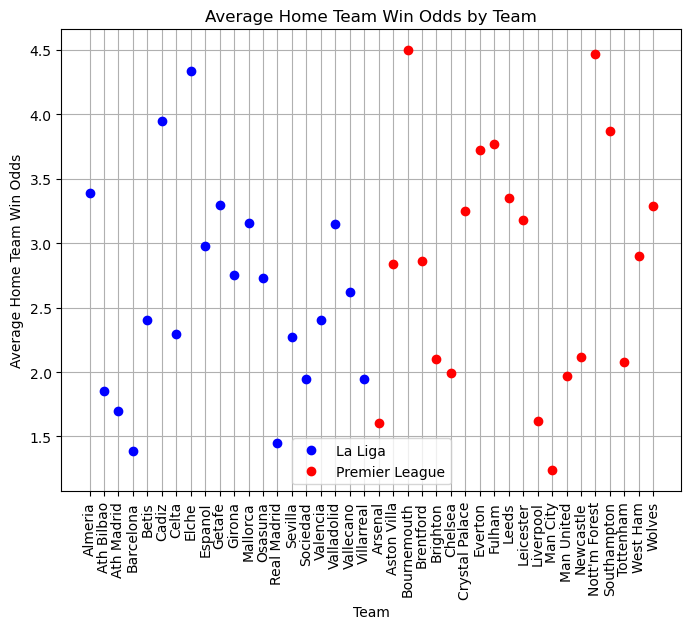

In [109]:
# Calculate the average of the home team win odds for the first and second leagues
# Groupby function(): Creates a dataset with the unique elements of the column "HomeTeam" 
# and another column with the mean of "bet+'H'" that has "HomeTeam" unique
x = sp.groupby('HomeTeam')[bet + 'H'].mean() 
y = pl.groupby('HomeTeam')[bet + 'H'].mean()

# Create a plot of the home team win odds
plt.figure(figsize=(8, 6)) # Adjust the figure size
plt.plot(x, '.', color='blue', markersize=12) # plot a graph with color blue, marker size 12, and a point to represent each entry
plt.plot(y, '.', color='red', markersize=12)

# Add a legend, title, and axis labels
plt.legend([my_dict[league1], my_dict[league2]]) # Add a legend
plt.title('Average Home Team Win Odds by Team') # Add a title
plt.xlabel('Team') # Add x-label
plt.ylabel('Average Home Team Win Odds') # Add y-label

# Rotate the x-axis tick labels vertically for readability
plt.xticks(rotation='vertical')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()

## Q2: what is the average Draw odds for each team in both leagues

## Average Draw odds for each team in both leagues

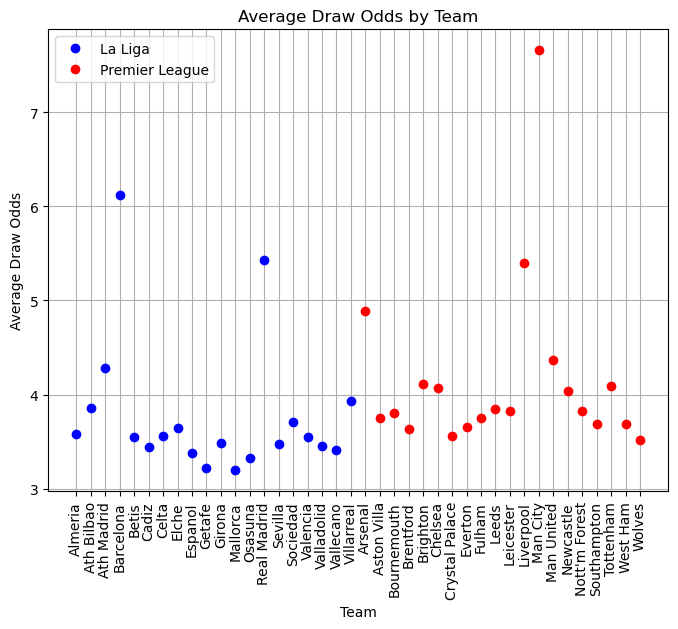

In [110]:
# Calculate the average of the draw odds for the first and second leagues
x = sp.groupby('HomeTeam')[bet + 'D'].mean()
y = pl.groupby('HomeTeam')[bet + 'D'].mean()

# Create a plot of the draw odds
plt.figure(figsize=(8, 6))
plt.plot(x, '.', color='blue', markersize=12)
plt.plot(y, '.', color='red', markersize=12)

# Add a legend, title, and axis labels
plt.legend([my_dict[league1], my_dict[league2]])
plt.title('Average Draw Odds by Team')
plt.xlabel('Team')
plt.ylabel('Average Draw Odds')

# Rotate the x-axis tick labels vertically for readability
plt.xticks(rotation='vertical')

#Show the grid
plt.grid(True)

# Show the plot
plt.show()

## Q3: what is the average AwayTeam win odds for each team in both leagues

## The average AwayTeam win odds for each team in both leagues

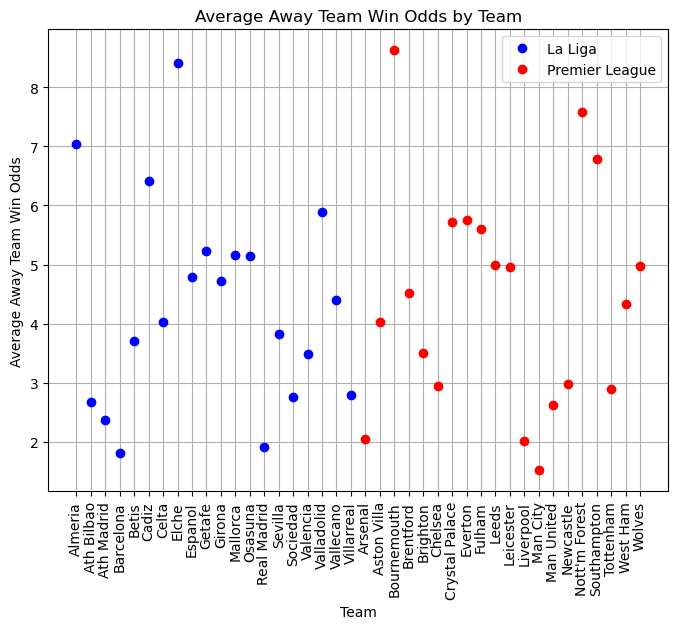

In [111]:
# Calculate the average of the away team win odds for the first and second leagues
x = sp.groupby('AwayTeam')[bet+'A'].mean()
y = pl.groupby('AwayTeam')[bet+'A'].mean()

# Create a plot of the away team win odds
plt.figure(figsize=(8, 6))
plt.plot(x, '.', color='blue', markersize=12)
plt.plot(y, '.', color='red', markersize=12)

# Add a legend, title, and axis labels
plt.legend([my_dict[league1], my_dict[league2]])
plt.title('Average Away Team Win Odds by Team')
plt.xlabel('Team')
plt.ylabel('Average Away Team Win Odds')

# Rotate the x-axis tick labels vertically for readability
plt.xticks(rotation='vertical')

#Show the grid
plt.grid(True)

# Show the plot
plt.show()

## In order to make it much easier, we will store insights in an array and print the array at the end of the analysis

In [112]:
# array of strings to store insights
answer_array = ["Here are the insights of the analysis"]
print(answer_array)

['Here are the insights of the analysis']


## Highest scoring teams in both leagues

## Q4: what are the teams who scored most goals in each league?

## Q5: what are the teams who conceded most goals in each league?

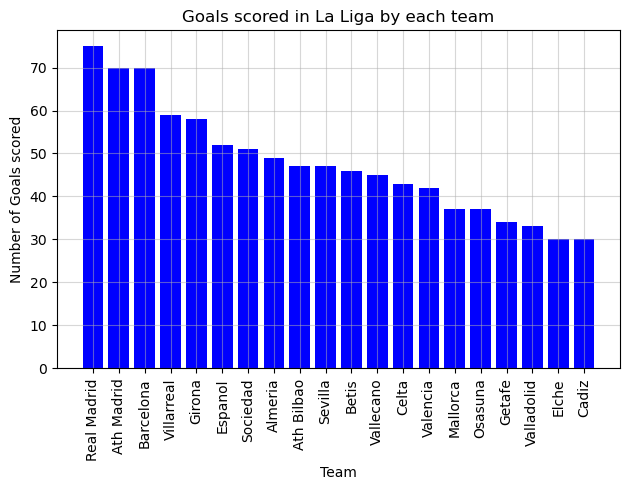

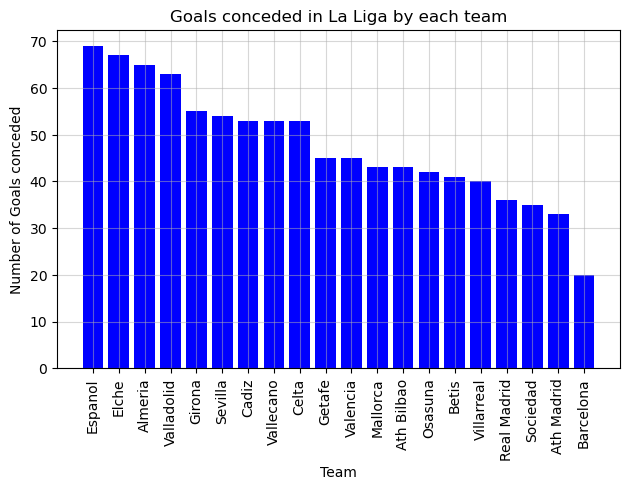

955.0 goals scored in La Liga


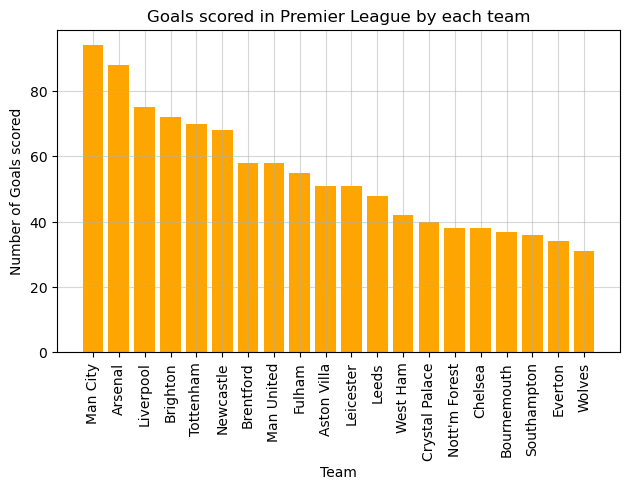

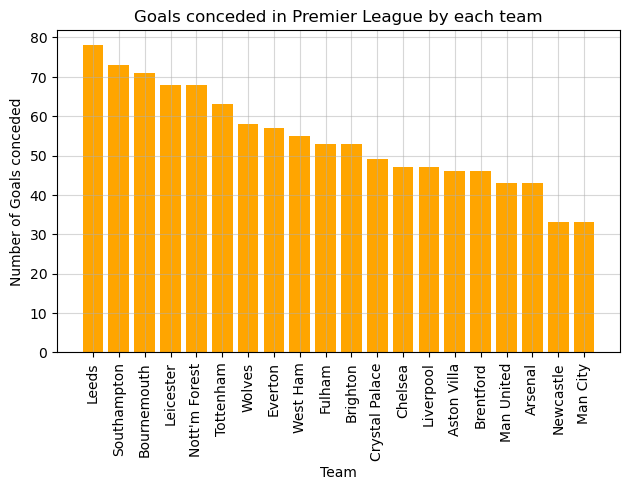

1084.0 goals scored in Premier League


In [113]:
# The function calculates the number of Goals scored for each team in a given DataFrame by traversing the data set and increment
# the HomeTeam with FTHG (Full-time Home goals) and the AwayTeam with FTAG (Full-time Away goals)
# and plots a bar chart to visualize the results
def calculate_highest_scoring_teams(df, web, color, league_name,answer_array,season):

    # Calculate the number of unique teams in the DataFrame
    teams = df['HomeTeam'].nunique()

    # Create a new DataFrame to store the number of goals scored and goals conceded for each team
    x = pd.DataFrame({"Team": df['HomeTeam'].unique(), "Goals scored": np.zeros(teams), "Goals conceded": np.zeros(teams)})

    # Loop through each row of the DataFrame and increment the goals for each team
    for i in range(len(df)):
        # Select the Home and Away team
        home_team = df['HomeTeam'][i]
        away_team = df['AwayTeam'][i]
        
        # Increment the goals scored for the Home and Away teams
        x.loc[x['Team'] == home_team, 'Goals scored'] += df['FTHG'][i]
        x.loc[x['Team'] == away_team, 'Goals scored'] += df['FTAG'][i]
        
        # To calculate the conceded goals, we just switch the home team with the away team
        x.loc[x['Team'] == away_team, 'Goals conceded'] += df['FTHG'][i]
        x.loc[x['Team'] == home_team, 'Goals conceded'] += df['FTAG'][i]

    # Sort the values in the new DataFrame by the number of Goals scored in descending order
    x = x.sort_values(by='Goals scored', ascending=False)
    
    # Store the insight in the answer array
    answer_array.append(f"The highest scoring team in {league_name} for the season {season} is {x.iloc[0]['Team']} with {x.iloc[0]['Goals scored']} goals")
    answer_array.append(f"The lowest scoring team in {league_name} for the season {season} is {x.iloc[-1]['Team']} with {x.iloc[-1]['Goals scored']} goals")


    # Plot a bar chart to visualize the number of goals scored for each team
    plt.bar(x['Team'], x['Goals scored'], color=color)
    plt.xlabel("Team")
    plt.ylabel("Number of Goals scored")
    plt.xticks(rotation=90)
    plt.grid(True, alpha = 0.5) #Show the grid
    plt.tight_layout() # Adjust the layout of the plot
    plt.title(f"Goals scored in {league_name} by each team")
    plt.show()
    
    
    
    # Sort the values in the new DataFrame by the number of Goals conceded in descending order
    x = x.sort_values(by='Goals conceded', ascending=False)
    
    # Store the insight in the answer array
    answer_array.append(f"The highest conceding team in {league_name} for the season {season} is {x.iloc[0]['Team']} with {x.iloc[0]['Goals conceded']} goals ")
    answer_array.append(f"The lowest conceding team in {league_name} for the season {season} is {x.iloc[-1]['Team']} with {x.iloc[-1]['Goals conceded']} goals")
    
    # Plot a bar chart to visualize the number of goals conceded for each team
    plt.bar(x['Team'], x['Goals conceded'], color=color)
    plt.xlabel("Team")
    plt.ylabel("Number of Goals conceded")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(True, alpha = 0.5) #Show the grid
    plt.title(f"Goals conceded in {league_name} by each team")
    plt.show()

    # Print the total number of scored goals in the league
    print(f"{x['Goals scored'].sum()} goals scored in {league_name}")
    


# Call the function for two different leagues' DataFrames and display the results in a single plot with a legend
calculate_highest_scoring_teams(sp, bet, 'blue', my_dict[league1],answer_array,season1)
calculate_highest_scoring_teams(pl, bet, 'orange', my_dict[league2],answer_array,season2)

# To Uncover the Unpredictable: Two Methods to Calculate Unexpected Matches in Football Analysis

In our analysis, we explore unexpected matches using two methods: the first one compares the winning side on the betting website with the actual winning team, while the second method checks for any changes in the winning team after half-time. Get ready to uncover the most exciting and unpredictable moments in football!

## Q6: Plot graphs that represent the unexpected matches using the first algorithm

## Betting website method

81 unexpected matches in La Liga
79 unexpected matches in Premier League


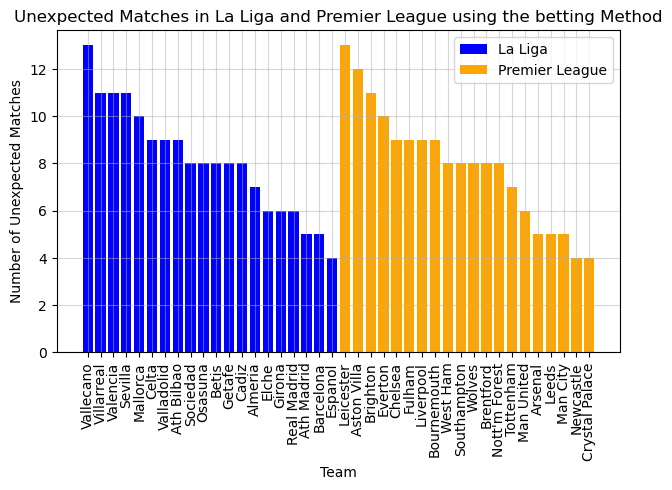

In [114]:
# The function calculates the number of unexpected matches for each team in a given DataFrame using a specified method
# and plots a bar chart to visualize the results
def calculate_unexpected_matches(df, web, color, league_name,answer_array, season):

    # Calculate the number of unique teams in the DataFrame
    teams = df['HomeTeam'].nunique()

    # Create a new DataFrame to store the number of unexpected matches for each team
    x = pd.DataFrame({"Team": df['HomeTeam'].unique(), "Unexpected Matches": np.zeros(teams)})

    # Loop through each row of the DataFrame and count the number of unexpected matches for each team
    num_unexpected_matches = 0
    for i in range(len(df)):
        if (df[web+'H'][i] > df[web+'A'][i] and df['FTR'][i] == 'H') or (df[web+'H'][i] < df[web+'A'][i] and df['FTR'][i] == 'A'):
            home_team = df['HomeTeam'][i]
            away_team = df['AwayTeam'][i]
            x.loc[x['Team'] == home_team, 'Unexpected Matches'] += 1
            x.loc[x['Team'] == away_team, 'Unexpected Matches'] += 1
            num_unexpected_matches += 1

    # Sort the values in the new DataFrame by the number of unexpected matches in descending order
    x = x.sort_values(by='Unexpected Matches', ascending=False)

    # Store the insight in our array
    answer_array.append(f"{x.iloc[0]['Team']} has the most unexpected matches in {league_name} for the season {season} with {x.iloc[0]['Unexpected Matches']} match using the betting method")
    answer_array.append(f"{x.iloc[-1]['Team']} has the least unexpected matches in {league_name} for the season {season} with {x.iloc[-1]['Unexpected Matches']} match using the betting method")

    # Plot a bar chart to visualize the number of unexpected matches for each team
    plt.bar(x['Team'], x['Unexpected Matches'], color=color)
    plt.xlabel("Team")
    plt.ylabel("Number of Unexpected Matches")
    plt.xticks(rotation=90)

    # Adjust the layout of the plot and print the total number of unexpected matches
    plt.tight_layout()
    print(f"{num_unexpected_matches} unexpected matches in {league_name}")
    
    # Store the insight in our array
    answer_array.append(f"The number of unexpected matches using the first method (betting method) in {league_name} for the season {season} is {num_unexpected_matches}")


# Call the function for two different DataFrames and display the results in a single plot with a legend
calculate_unexpected_matches(sp, bet, 'blue', my_dict[league1],answer_array,season1)
calculate_unexpected_matches(pl, bet, 'orange', my_dict[league2],answer_array, season2)
plt.legend([my_dict[league1], my_dict[league2]], loc='upper right')
plt.title(f"Unexpected Matches in {my_dict[league1]} and {my_dict[league2]} using the betting Method")

#Show the grid
plt.grid(True, alpha = 0.5)

# Display the plot
plt.show()

### Representing Unexpected matches using a scatter plot

The scatter plot here represents each match that has been selected by this algorithm

Number of unexpected matches in La Liga : 81


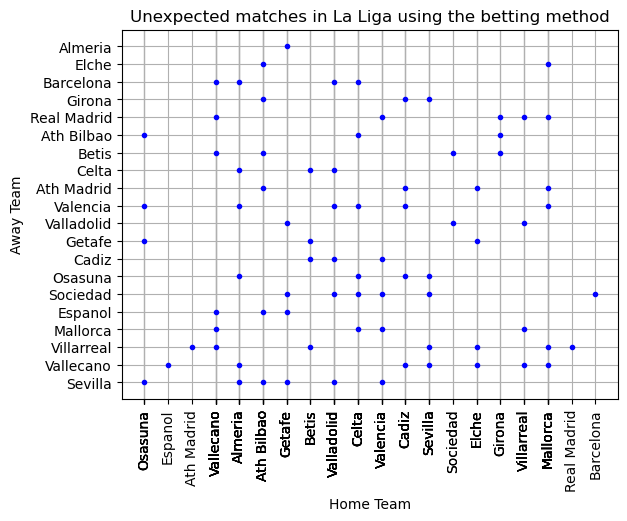

Number of unexpected matches in Premier League : 79


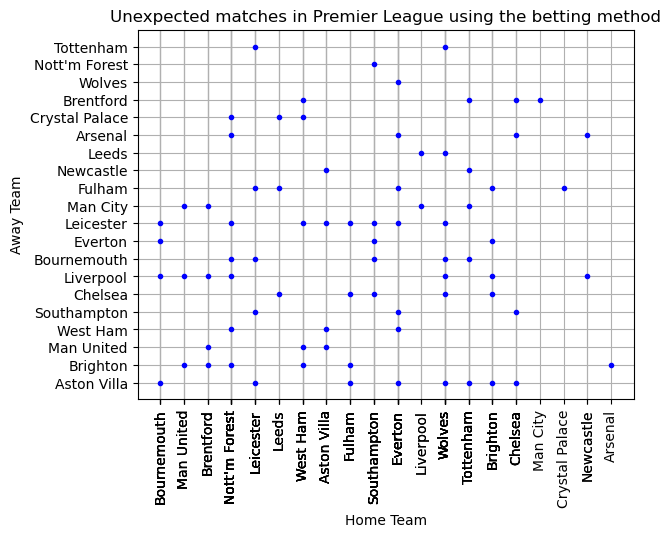

In [115]:
# Define a function to plot unexpected matches
def plot_unexpected_matches(df, league_name):
    # Filter the dataframe to get only unexpected matches
    unexpected_matches = df[(df[bet+'H'] > df[bet+'A']) & (df['FTR'] == 'H') | (df[bet+'H'] < df[bet+'A']) & (df['FTR'] == 'A')]

    # Count the number of unexpected matches
    num_unexpected_matches = len(unexpected_matches)

    # Create a scatter plot of the unexpected matches
    plt.plot(unexpected_matches['HomeTeam'], unexpected_matches['AwayTeam'], '.', color='blue')

    # Set the x-axis labels to the home team names and rotate them vertically
    plt.xticks(unexpected_matches['HomeTeam'], rotation='vertical')
    plt.xlabel('Home Team')
    plt.ylabel('Away Team')

    # Set the plot title
    plt.title(f'Unexpected matches in {league_name} using the betting method')

    # print the number of unexpected matches
    print(f"Number of unexpected matches in {league_name} : {num_unexpected_matches}")

    #Show the grid
    plt.grid(True)

    # Show the plot
    plt.show()

# Call the function for each league
plot_unexpected_matches(sp, my_dict[league1])
plot_unexpected_matches(pl, my_dict[league2])

## Q7: Plot graphs that represent the unexpected matches using the second algorithm

## Half-time method

166 unexpected matches in La Liga
151 unexpected matches in Premier League


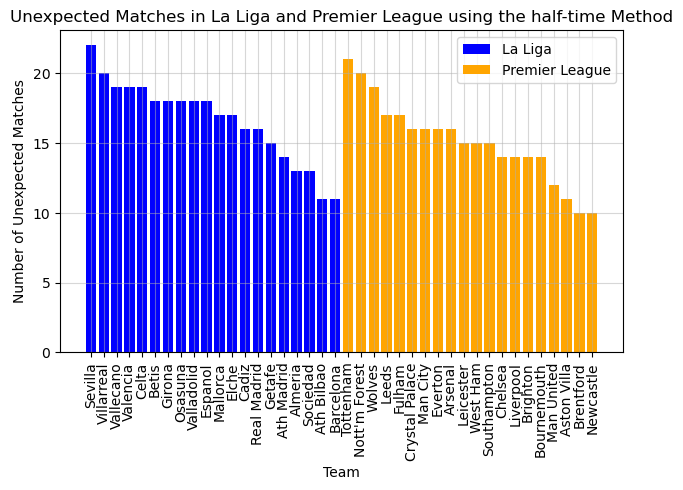

In [116]:
# The function calculates the number of unexpected matches for each team in a given DataFrame using a specified method
# and plots a bar chart to visualize the results
def calculate_unexpected_matches(df, web, color, league_name,answer_array, season):

    # Calculate the number of unique teams in the DataFrame
    teams = df['HomeTeam'].nunique()

    # Create a new DataFrame to store the number of unexpected matches for each team
    x = pd.DataFrame({"Team": df['HomeTeam'].unique(), "Unexpected Matches": np.zeros(teams)})
    
    # Filter the dataframe to get only unexpected matches
    unexpected_matches = df[df['FTR'] != df['HTR']]
    
    # Count the number of unexpected matches
    num_unexpected_matches = len(unexpected_matches)
    
    # Loop through each row of the DataFrame and count the number of unexpected matches for each team
    for i in range(len(unexpected_matches)):
            home_team = unexpected_matches.iloc[i]['HomeTeam']
            away_team = unexpected_matches.iloc[i]['AwayTeam']
            x.loc[x['Team'] == home_team, 'Unexpected Matches'] += 1
            x.loc[x['Team'] == away_team, 'Unexpected Matches'] += 1

    # Sort the values in the new DataFrame by the number of unexpected matches in descending order
    x = x.sort_values(by='Unexpected Matches', ascending=False)

    # Store the insight in our array
    answer_array.append(f"{x.iloc[0]['Team']} has the most unexpected matches in {league_name} for the season {season} with {x.iloc[0]['Unexpected Matches']} matches using the half-time method")
    answer_array.append(f"{x.iloc[-1]['Team']} has the least unexpected matches in {league_name} for the season {season} with {x.iloc[-1]['Unexpected Matches']} matches using the half-time method")

    # Plot a bar chart to visualize the number of unexpected matches for each team
    plt.bar(x['Team'], x['Unexpected Matches'], color=color)
    plt.xlabel("Team")
    plt.ylabel("Number of Unexpected Matches")
    plt.xticks(rotation=90)

    # Adjust the layout of the plot and print the total number of unexpected matches
    plt.tight_layout()
    print(f"{num_unexpected_matches} unexpected matches in {league_name}")
    
    # Store the insight in our array
    answer_array.append(f"The number of unexpected matches using the second method (half-time method) in {league_name} for the season {season} is {num_unexpected_matches}")


# Call the function for two different DataFrames and display the results in a single plot with a legend
calculate_unexpected_matches(sp, bet, 'blue', my_dict[league1],answer_array,season1)
calculate_unexpected_matches(pl, bet, 'orange', my_dict[league2],answer_array, season2)
plt.legend([my_dict[league1], my_dict[league2]], loc='upper right')
plt.title(f"Unexpected Matches in {my_dict[league1]} and {my_dict[league2]} using the half-time Method")

#Show the grid
plt.grid(True, alpha = 0.5)

# Display the plot
plt.show()

### Representing the unexpected matches using the second method

Number of unexpected matchesin La Liga : 166


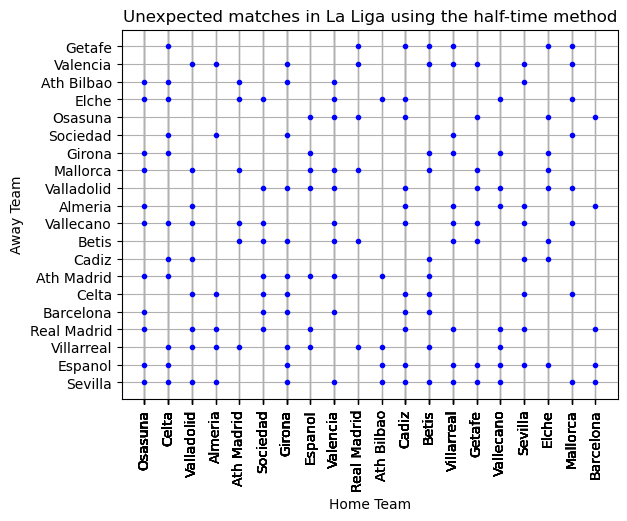

Number of unexpected matchesin Premier League : 151


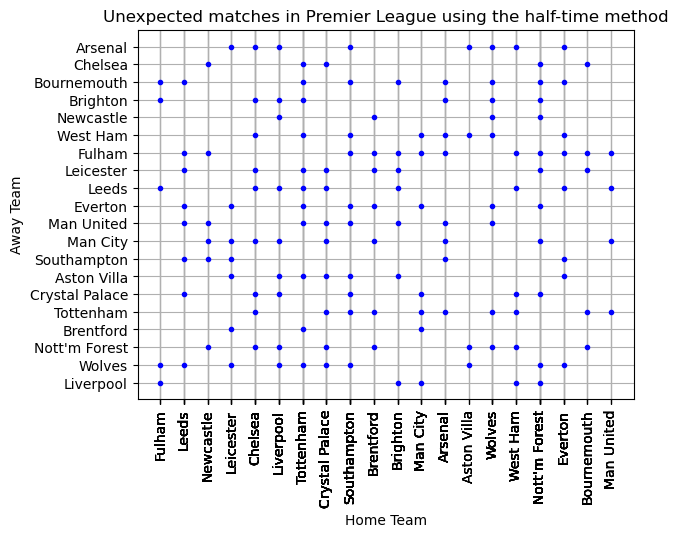

In [117]:
# Define a function to plot unexpected matches
def plot_unexpected_matches(df, league_name,season):
    # Filter the dataframe to get only unexpected matches
    unexpected_matches = df[df['FTR'] != df['HTR']]

    # Count the number of unexpected matches
    num_unexpected_matches = len(unexpected_matches)

    # Create a scatter plot of the unexpected matches
    plt.plot(unexpected_matches['HomeTeam'], unexpected_matches['AwayTeam'], '.', color='blue')

    # Set the x-axis and y-axis labels
    plt.xlabel('Home Team')
    plt.ylabel('Away Team')

    # Set the x-axis labels to the home team names and rotate them vertically
    plt.xticks(unexpected_matches['HomeTeam'], rotation='vertical')

    # Set the plot title
    plt.title(f'Unexpected matches in {league_name} using the half-time method')

    # print the number of unexpected matches
    print(f"Number of unexpected matchesin {league_name} : {num_unexpected_matches}")
    
    #Show the grid
    plt.grid(True)


    # Show the plot
    plt.show()

# Call the function for each league
plot_unexpected_matches(sp, my_dict[league1],season1)
plot_unexpected_matches(pl, my_dict[league2],season2)

# Inferences and Conclusion

After doing our complete analysis, here are the findings:

In this Exploratory Data Analysis (EDA) project, I developed a program that allowed me to analyze and compare two different leagues at any time. After conducting various tests, I discovered several interesting insights.

In [118]:
print('```\n')
for element in answer_array:
    print(f'- {element}')
print('\n```')

```

- Here are the insights of the analysis
- The highest scoring team in La Liga for the season 2223 is Real Madrid with 75.0 goals
- The lowest scoring team in La Liga for the season 2223 is Cadiz with 30.0 goals
- The highest conceding team in La Liga for the season 2223 is Espanol with 69.0 goals 
- The lowest conceding team in La Liga for the season 2223 is Barcelona with 20.0 goals
- The highest scoring team in Premier League for the season 2223 is Man City with 94.0 goals
- The lowest scoring team in Premier League for the season 2223 is Wolves with 31.0 goals
- The highest conceding team in Premier League for the season 2223 is Leeds with 78.0 goals 
- The lowest conceding team in Premier League for the season 2223 is Man City with 33.0 goals
- Vallecano has the most unexpected matches in La Liga for the season 2223 with 13.0 match using the betting method
- Espanol has the least unexpected matches in La Liga for the season 2223 with 4.0 match using the betting method
- The nu

# References and Future work

- The datasets used in this project were obtained from  https://www.football-data.co.uk/ , which provides comprehensive statistics on various leagues and betting websites. Overall, this project has allowed me to explore and gain insights into the differences between two leagues, and I look forward to developing it further in the future.

- Future work may be done using the same data sets by doing like a machine learning program to predict further predictions for the next upcoming seasons for a certain league.

- To further improve the program, I plan to add more leagues and betting websites in the future.